# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ipil
Processing Record 2 of Set 1 | sosnogorsk
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | kayangel
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | kununurra
Processing Record 8 of Set 1 | springs
Processing Record 9 of Set 1 | gobabis
Processing Record 10 of Set 1 | mudgere
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | noumea
Processing Record 14 of Set 1 | luocheng
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | puerto leguizamo
Processing Record 18 of Set 1 | goba
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | inarajan village
Processing Record 22 of Set 1 | inhambane
Processing Record

Processing Record 36 of Set 4 | san borja
Processing Record 37 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 38 of Set 4 | happy valley-goose bay
Processing Record 39 of Set 4 | quellon
Processing Record 40 of Set 4 | gisborne
Processing Record 41 of Set 4 | beyla
Processing Record 42 of Set 4 | coahuayana de hidalgo
Processing Record 43 of Set 4 | keflavik
Processing Record 44 of Set 4 | dryden
Processing Record 45 of Set 4 | fauske
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | red hill
Processing Record 48 of Set 4 | nanchong
Processing Record 49 of Set 4 | fort st. john
Processing Record 0 of Set 5 | paita
Processing Record 1 of Set 5 | lake city
Processing Record 2 of Set 5 | fale old settlement
Processing Record 3 of Set 5 | selfoss
Processing Record 4 of Set 5 | san andres
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | punta cana
Processing Record 7 of Set 5 | reggane
Processing Record 8 of Set 5 | ola
Processing 

Processing Record 27 of Set 8 | itoman
Processing Record 28 of Set 8 | barretos
Processing Record 29 of Set 8 | flying fish cove
Processing Record 30 of Set 8 | bubaque
Processing Record 31 of Set 8 | vilyuchinsk
Processing Record 32 of Set 8 | celestun
Processing Record 33 of Set 8 | gelemso
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | kilindoni
Processing Record 36 of Set 8 | darende
Processing Record 37 of Set 8 | tual
Processing Record 38 of Set 8 | wynyard
Processing Record 39 of Set 8 | katsuura
Processing Record 40 of Set 8 | stephenville
Processing Record 41 of Set 8 | mesquite
Processing Record 42 of Set 8 | port saint john's
Processing Record 43 of Set 8 | luderitz
Processing Record 44 of Set 8 | buala
Processing Record 45 of Set 8 | kurmuk
Processing Record 46 of Set 8 | phayao
Processing Record 47 of Set 8 | mukah
City not found. Skipping...
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | badger
Processing Record 0 of S

Processing Record 16 of Set 12 | sur
Processing Record 17 of Set 12 | puerto baquerizo moreno
Processing Record 18 of Set 12 | aykol
City not found. Skipping...
Processing Record 19 of Set 12 | boone
Processing Record 20 of Set 12 | dompu
Processing Record 21 of Set 12 | al faw
Processing Record 22 of Set 12 | mili
Processing Record 23 of Set 12 | twon-brass
Processing Record 24 of Set 12 | thinadhoo
Processing Record 25 of Set 12 | nacala
Processing Record 26 of Set 12 | sandakan
Processing Record 27 of Set 12 | carauari
Processing Record 28 of Set 12 | dubbo
Processing Record 29 of Set 12 | alofi
Processing Record 30 of Set 12 | isiro
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | mount gambier
Processing Record 33 of Set 12 | revda
Processing Record 34 of Set 12 | moeiwadi
Processing Record 35 of Set 12 | bac kan
Processing Record 36 of Set 12 | malango
Processing Record 37 of Set 12 | simga
Processing Record 38 of Set 12 | kyren
Processing Record 39 of

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ipil,7.7500,122.5167,303.46,64,100,2.21,PH,1683780264
1,sosnogorsk,63.6023,53.8817,276.53,63,45,0.40,RU,1683780265
2,edinburgh of the seven seas,-37.0676,-12.3116,287.94,66,100,9.29,SH,1683780173
3,kayangel,8.0823,134.7173,302.32,68,100,1.23,PW,1683780266
4,waitangi,-43.9535,-176.5597,283.61,90,62,3.58,NZ,1683780155


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ipil,7.7500,122.5167,303.46,64,100,2.21,PH,1683780264
1,sosnogorsk,63.6023,53.8817,276.53,63,45,0.40,RU,1683780265
2,edinburgh of the seven seas,-37.0676,-12.3116,287.94,66,100,9.29,SH,1683780173
3,kayangel,8.0823,134.7173,302.32,68,100,1.23,PW,1683780266
4,waitangi,-43.9535,-176.5597,283.61,90,62,3.58,NZ,1683780155


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

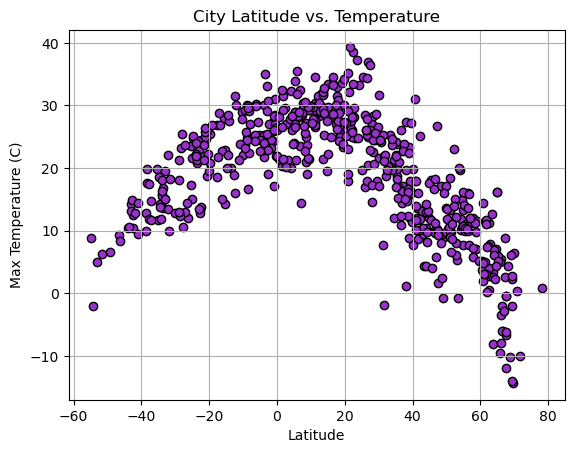

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'] - 273.15, color = "darkorchid", edgecolors = "black")
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

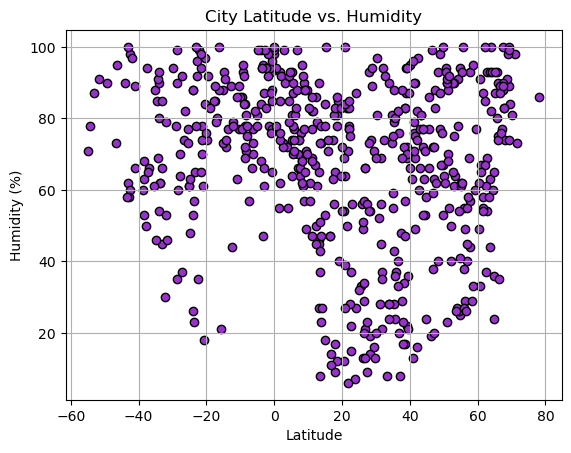

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = "darkorchid", edgecolors = "black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

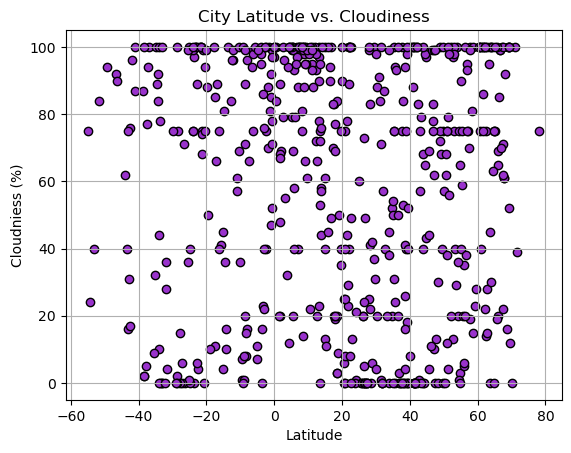

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = "darkorchid", edgecolors = "black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudniess (%)')
# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

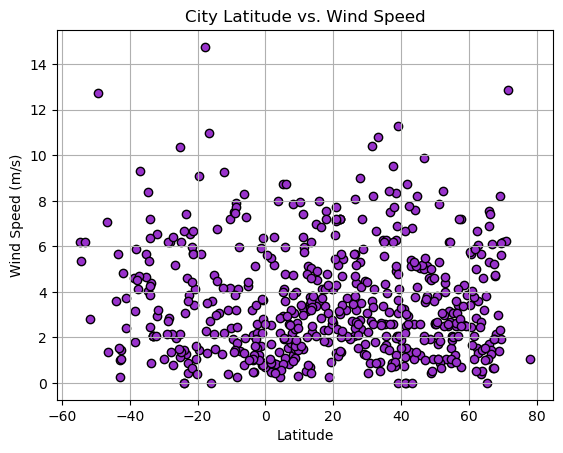

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = "darkorchid", edgecolors = "black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label):
    # Compute the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Compute the regression line
    regress_values = x * slope + intercept
    
    # Create a scatter plot of the data
    plt.scatter(x, y)
    
    # Plot the regression line
    plt.plot(x, regress_values, "r-")
    
    # Annotate the plot with the equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x), min(y)), fontsize=15, color="red")
    
    # Add axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show the plot
    plt.show()

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,ipil,7.7500,122.5167,303.46,64,100,2.21,PH,1683780264,150.811111
1,sosnogorsk,63.6023,53.8817,276.53,63,45,0.40,RU,1683780265,135.850000
3,kayangel,8.0823,134.7173,302.32,68,100,1.23,PW,1683780266,150.177778
9,mudgere,13.1333,75.6333,303.11,46,90,0.68,IN,1683780269,150.616667
10,whitehorse,60.7161,-135.0538,287.58,33,75,5.66,CA,1683780072,141.988889


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,287.94,66,100,9.29,SH,1683780173,142.188889
4,waitangi,-43.9535,-176.5597,283.61,90,62,3.58,NZ,1683780155,139.783333
5,adamstown,-25.0660,-130.1015,294.82,61,100,10.36,PN,1683780169,146.011111
6,kununurra,-15.7667,128.7333,301.14,21,41,3.60,AU,1683780267,149.522222
7,springs,-26.2500,28.4000,285.19,82,0,1.97,ZA,1683780268,140.661111


###  Temperature vs. Latitude Linear Regression Plot

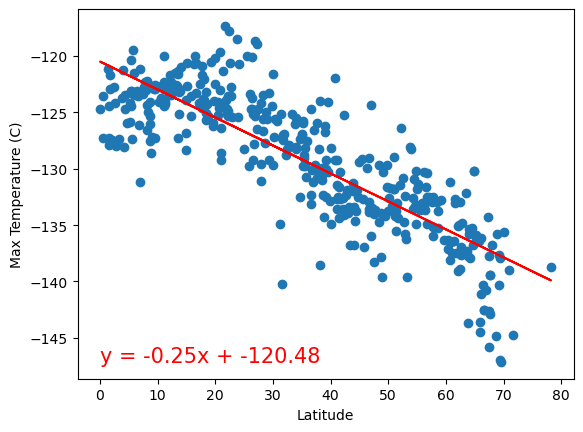

In [62]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp (C)'] - 273.15
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
plot_linear_regression(x, y, x_label, y_label)


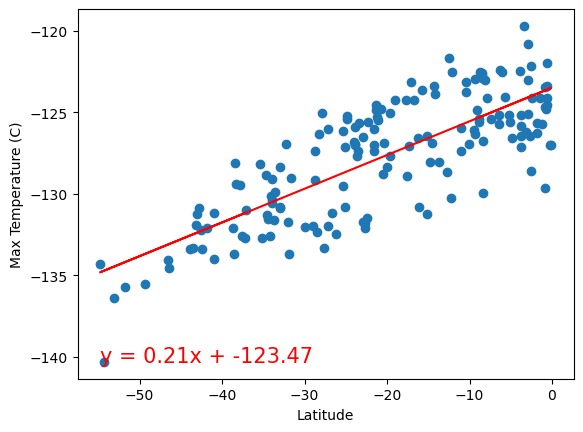

In [72]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp (C)'] - 273.15
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

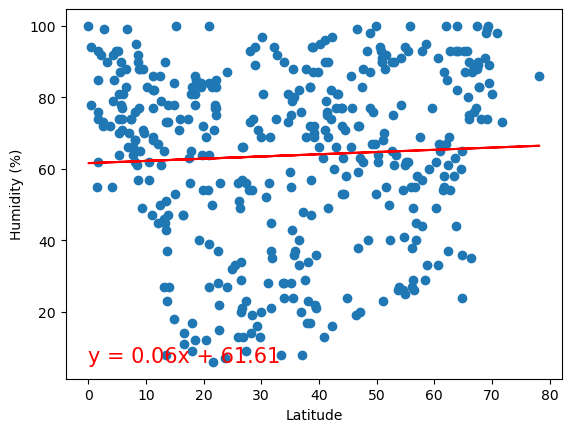

In [71]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plot_linear_regression(x, y, x_label, y_label)

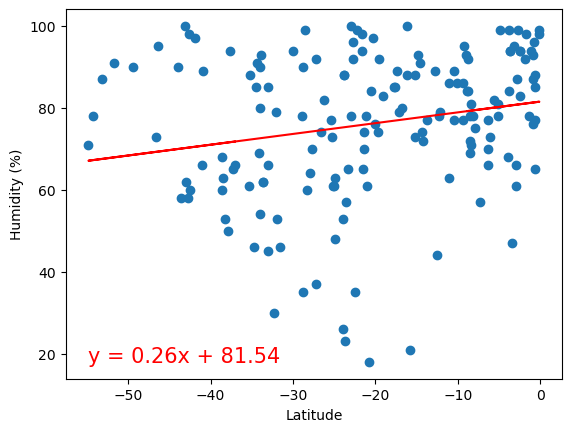

In [70]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

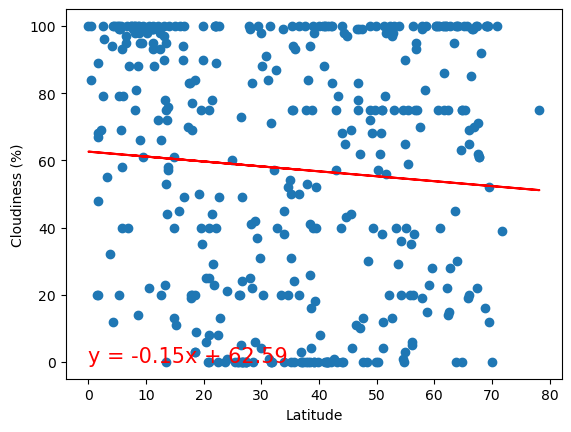

In [69]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plot_linear_regression(x, y, x_label, y_label)

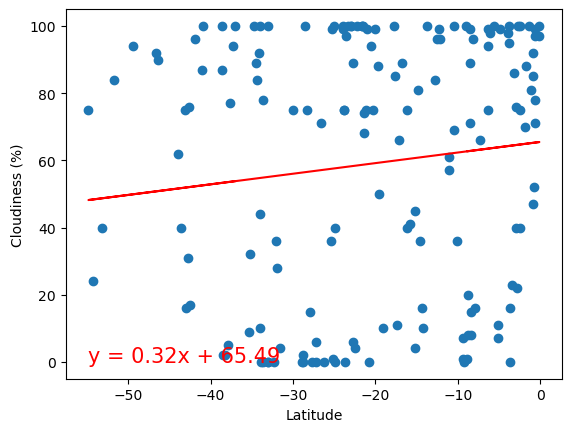

In [68]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

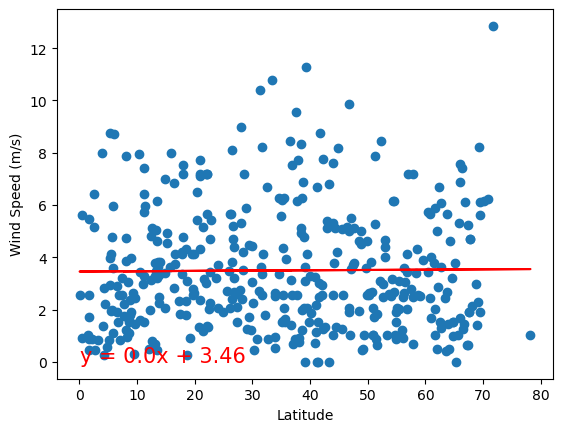

In [73]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
plot_linear_regression(x, y, x_label, y_label)

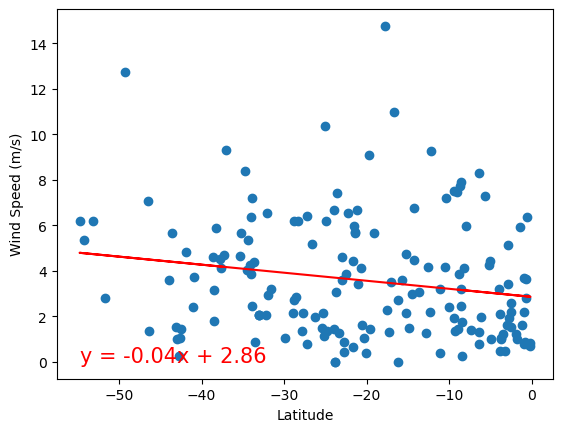

In [74]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE